# Importing all necessary libraries


In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import Request, urlopen
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

The survey on the diabetes management with machine learning depicts that machine learning and the individuals who may have diabetes will be identified. Material was contained on medical exams, blood and urine samples, and questionnaires for patients

In [191]:
dfa = pd.read_csv('diabetes_data_upload.csv')

In [192]:
dfa.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


The 'Class' feature column is identfied as the Target Variable Data

# Checking for Null Values in the Dataset

<AxesSubplot:>

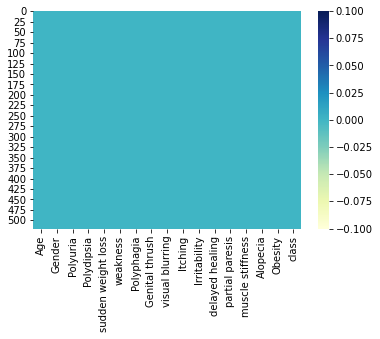

In [193]:
sns.heatmap(dfa.isnull(), cmap="YlGnBu")

Since the heatmap is spotless we can say there are no null values

In [194]:
dfa['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [195]:
#Mapping or Converting the text into values

dfa['Gender'] = dfa['Gender'].map({'Male':1,'Female':0})
dfa['class'] = dfa['class'].map({'Positive':1,'Negative':0})
dfa['Polyuria'] = dfa['Polyuria'].map({'Yes':1,'No':0})
dfa['Polydipsia'] = dfa['Polydipsia'].map({'Yes':1,'No':0})
dfa['sudden weight loss'] = dfa['sudden weight loss'].map({'Yes':1,'No':0})
dfa['weakness'] = dfa['weakness'].map({'Yes':1,'No':0})
dfa['Polyphagia'] = dfa['Polyphagia'].map({'Yes':1,'No':0})
dfa['Genital thrush'] = dfa['Genital thrush'].map({'Yes':1,'No':0})
dfa['visual blurring'] = dfa['visual blurring'].map({'Yes':1,'No':0})
dfa['Itching'] = dfa['Itching'].map({'Yes':1,'No':0})
dfa['Irritability'] = dfa['Irritability'].map({'Yes':1,'No':0})
dfa['delayed healing'] = dfa['delayed healing'].map({'Yes':1,'No':0})
dfa['partial paresis'] = dfa['partial paresis'].map({'Yes':1,'No':0})
dfa['muscle stiffness'] = dfa['muscle stiffness'].map({'Yes':1,'No':0})
dfa['Alopecia'] = dfa['Alopecia'].map({'Yes':1,'No':0})
dfa['Obesity'] = dfa['Obesity'].map({'Yes':1,'No':0})

# Exploratory Data Analysis

Determining the correlation between independent and dependent variables 

The independent variables that has high correlation with the dependent variables and less correlation with other variables

Basically we check how much eaach parameter or features given in the dataset affects our target result 'Class'

In [196]:
corrdata = dfa.corr()

<AxesSubplot:>

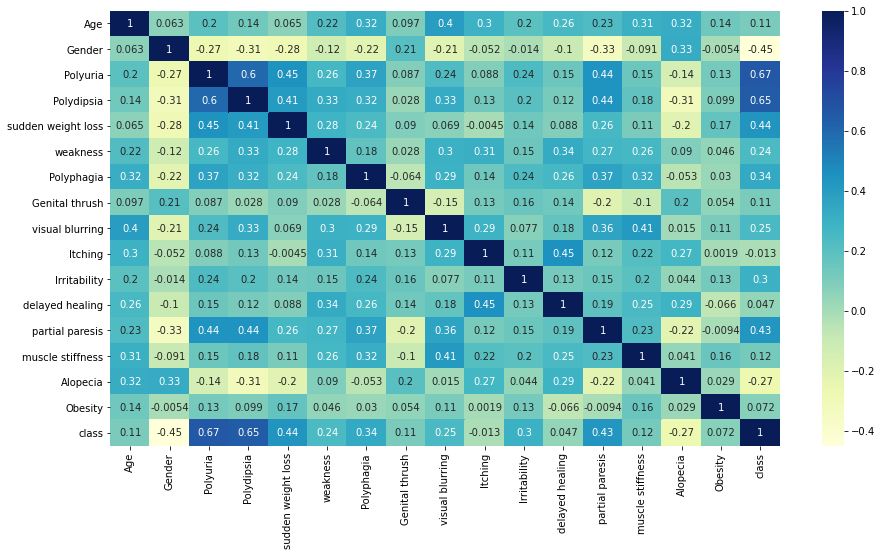

In [197]:
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True,cmap="YlGnBu")

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

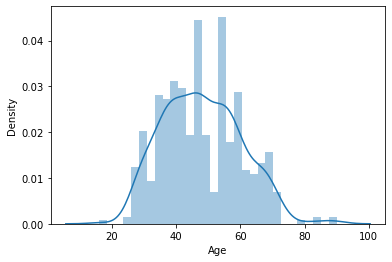

In [198]:
#The Age Distribution from the dataset
sns.distplot(dfa['Age'],bins=30)  

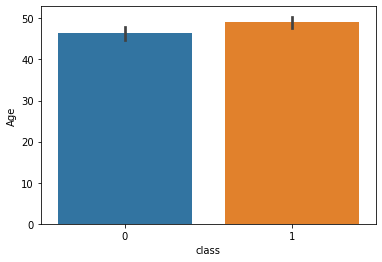

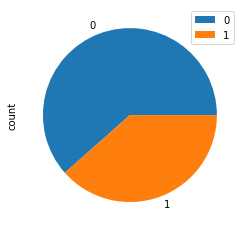

In [199]:


#Age/class(dependent variable)

sns.barplot(x='class',y='Age',data=dfa)
ds = dfa['class'].value_counts().reset_index()
ds.columns = ['class', 'count']
plot=ds.plot.pie(y='count')


<AxesSubplot:xlabel='class', ylabel='count'>

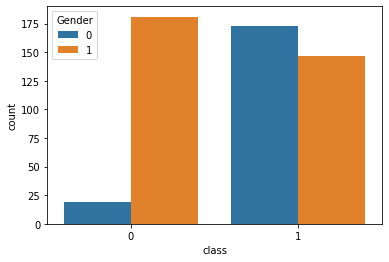

In [200]:
#Gender Distribution Plot
sns.countplot(x='class',data=dfa,hue='Gender')

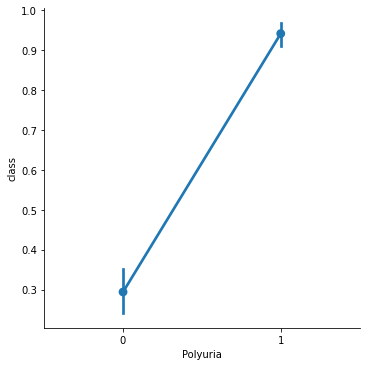

In [201]:
#Polyuria

sns.catplot(x="Polyuria", y="class", kind="point", data=dfa)



<AxesSubplot:xlabel='Polydipsia', ylabel='class'>

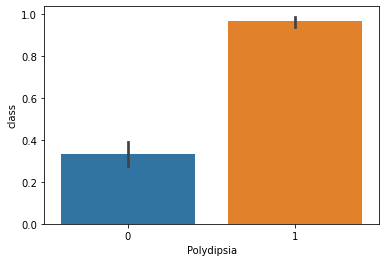

In [202]:
#Polydipsia

sns.barplot(x='Polydipsia',y='class',data=dfa)



<AxesSubplot:xlabel='class', ylabel='count'>

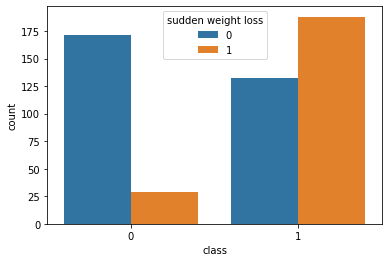

In [203]:
#Sudden weight loss

sns.countplot(x='class',data=dfa,hue='sudden weight loss')

<AxesSubplot:xlabel='class', ylabel='count'>

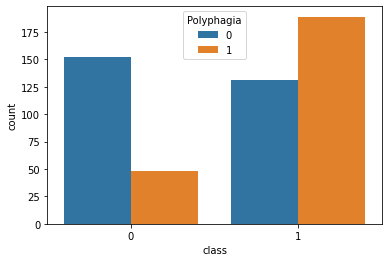

In [204]:
#Polyphagia

sns.countplot(x='class',data=dfa, hue='Polyphagia')

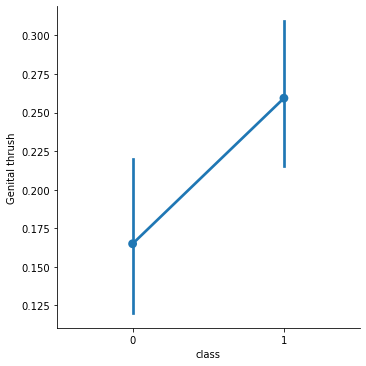

In [205]:
#Genital Thrush

sns.catplot(x='class',y='Genital thrush',kind='point',data=dfa)

<AxesSubplot:xlabel='class', ylabel='partial paresis'>

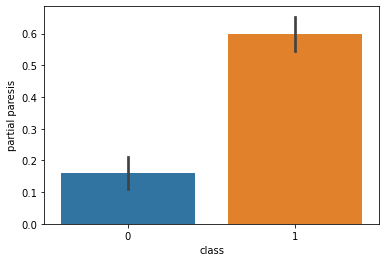

In [206]:
#Partial paresis

sns.barplot(x='class',y='partial paresis',data=dfa)

<AxesSubplot:xlabel='class', ylabel='Alopecia'>

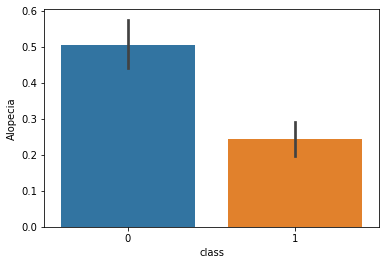

In [207]:
sns.barplot(x='class',y='Alopecia',data=dfa)

<AxesSubplot:xlabel='visual blurring', ylabel='class'>

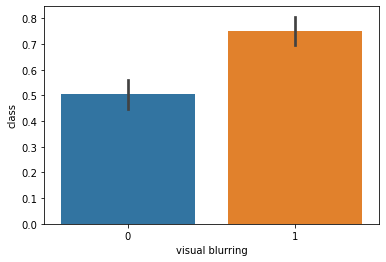

In [208]:
#Visual blurring

sns.barplot(x="visual blurring", y="class", data=dfa)

<AxesSubplot:xlabel='Itching', ylabel='class'>

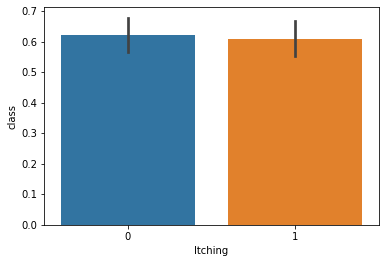

In [209]:
#Itching

sns.barplot(x="Itching", y="class", data=dfa)

<AxesSubplot:xlabel='class', ylabel='Obesity'>

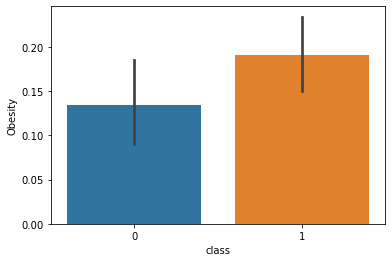

In [210]:
#Obesity

sns.barplot(x='class',y='Obesity',data=dfa)

<AxesSubplot:xlabel='Irritability', ylabel='class'>

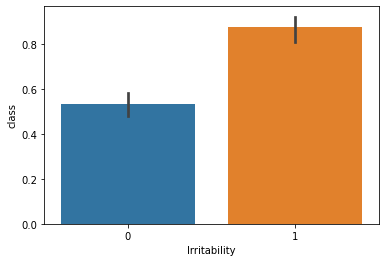

In [211]:
#Irritability

sns.barplot(x='Irritability',y='class',data=dfa)

# Separating the dataframe into their independent and dependent variable categories for determination of the best features to be used for model training

In [212]:
X1 = dfa.iloc[:,0:-1]
y1 = dfa.iloc[:,-1]

X1.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

Feature Selection using sklearn's KBest and Chi-Square test

In [213]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X1,y1)

In [214]:
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X1.columns)
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']

featurescores

,column,scores
0,Age,18.845767
1,Gender,38.747637
2,Polyuria,116.184593
3,Polydipsia,120.785515
4,sudden weight loss,57.749309
5,weakness,12.724262
6,Polyphagia,33.198418
7,Genital thrush,4.914009
8,visual blurring,18.124571
9,Itching,0.047826


Above are the features and their scores according to their significance to the target to be determined

<AxesSubplot:>

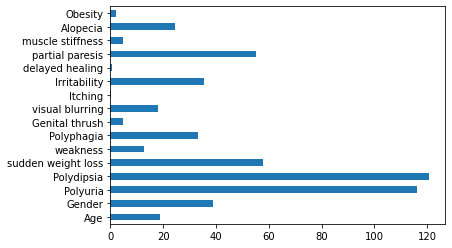

In [215]:
featureview=pd.Series(fit.scores_, index=X1.columns)
featureview.plot(kind='barh')

From here we need to select the top 10 features

In [216]:
print(featurescores.nlargest(10,'scores'))

                column      scores
3           Polydipsia  120.785515
2             Polyuria  116.184593
4   sudden weight loss   57.749309
12     partial paresis   55.314286
1               Gender   38.747637
10        Irritability   35.334127
6           Polyphagia   33.198418
14            Alopecia   24.402793
0                  Age   18.845767
8      visual blurring   18.124571


# Checking the variance of each feature

Features must have high variance with other features

In [217]:
from sklearn.feature_selection import VarianceThreshold
feature_high_variance = VarianceThreshold(threshold=(0.5*(1-0.5)))
falls=feature_high_variance.fit(X1)

In [218]:
dfa_scores1 = pd.DataFrame(falls.variances_)
dat1 = pd.DataFrame(X1.columns)

In [219]:
high_variance = pd.concat([dfa_scores1,dat1],axis=1)
high_variance.columns=['variance','cols']
high_variance[high_variance['variance']>0.2]

,variance,cols
0,147.374168,Age
1,0.232899,Gender
2,0.249985,Polyuria
3,0.247304,Polydipsia
4,0.243162,sudden weight loss
5,0.242511,weakness
6,0.248044,Polyphagia
8,0.247304,visual blurring
9,0.249819,Itching
11,0.248369,delayed healing


In [220]:
X = dfa[['Polydipsia','sudden weight loss','partial paresis','Irritability','Polyphagia','Age','visual blurring']]
y = dfa['class']

# Splitting Data into Training and Test sets and Standardizing the values


In [221]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Model Creation

# Logistic Regression

In [222]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

#Cross validation test for training data

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lg, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 83.90 %
std is 6.18 %


Prediction Below:

In [223]:
pre=lg.predict(X_test)

Checking the accuracy and confusion matrix:

In [224]:
logistic_regression=accuracy_score(pre,y_test)
print(accuracy_score(pre,y_test))
print(confusion_matrix(pre,y_test))

0.9134615384615384
[[36  3]
 [ 6 59]]


So, Logistic Regression test results in accuracy of 0.913

# Support Vector Machines (SVM)

In [225]:
from sklearn.svm import SVC
sv=SVC(kernel='linear',random_state=0)
sv.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [226]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=sv, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 81.24 %
std is 4.16 %


In [227]:
pre1=sv.predict(X_test)

In [228]:
svm_linear=accuracy_score(pre1,y_test)
print(accuracy_score(pre1,y_test))
print(confusion_matrix(pre1,y_test))

0.9230769230769231
[[37  3]
 [ 5 59]]


In [229]:
from sklearn.metrics import classification_report
print(classification_report(pre1,y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        40
           1       0.95      0.92      0.94        64

    accuracy                           0.92       104
   macro avg       0.92      0.92      0.92       104
weighted avg       0.92      0.92      0.92       104



In [230]:
from sklearn.svm import SVC
svrf=SVC(kernel='rbf',random_state=0)
svrf.fit(X_train,y_train)

SVC(random_state=0)

In [231]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svrf, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 90.38 %
std is 3.07 %


In [232]:
pre2=svrf.predict(X_test)

In [233]:
svm_rbf=accuracy_score(pre2,y_test)
print(accuracy_score(pre2,y_test))
print(confusion_matrix(pre2,y_test))

0.9038461538461539
[[39  7]
 [ 3 55]]


In [234]:
from sklearn.neighbors import KNeighborsClassifier
score=[]

for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    pre3=knn.predict(X_test)
    ans=accuracy_score(pre3,y_test)
    score.append(round(100*ans,2))
print(sorted(score,reverse=True)[:5])
knn=sorted(score,reverse=True)[:1]

[96.15, 95.19, 95.19, 94.23, 94.23]


# Naive bayes

Bayesian networks are a probabilistic model through which it is feasible to construct a graph between the causes of an event - independent variables and its consequences - dependent variables.

The method would be able to classify a new set of independent variables and decide which class they belong to depending on the statistical function that produces the highest value using these specified functions. In the case of diseases, the system operates from a series of simple parameters taken from the patient and does not require laboratory analysis 

In [235]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [236]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=gb, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 81.25 %
std is 4.79 %


In [237]:
pre4=gb.predict(X_test)

In [238]:
Naive_bayes_Gaussian_nb=accuracy_score(pre4,y_test)
print(accuracy_score(pre4,y_test))
print(confusion_matrix(pre4,y_test))

0.9326923076923077
[[38  3]
 [ 4 59]]


# Decision Trees

In [239]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini')
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [240]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 90.13 %
std is 2.58 %


In [241]:
pre5=dc.predict(X_test)

In [242]:
Decisiontrees_classifier=accuracy_score(pre5,y_test)
print(accuracy_score(pre5,y_test))
print(confusion_matrix(pre5,y_test))

0.9519230769230769
[[40  3]
 [ 2 59]]


# Random Forest Classifer

In [243]:
from sklearn.ensemble import RandomForestClassifier
estime=[]
for i in range(1,100):
    rc=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    rc.fit(X_train,y_train)

In [244]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 91.34 %
std is 2.47 %


In [245]:
pre6 = rc.predict(X_test)

In [246]:
Random_forest=accuracy_score(pre6,y_test)
print(accuracy_score(pre6,y_test))
print(confusion_matrix(pre6,y_test))

0.9519230769230769
[[39  2]
 [ 3 60]]


In [247]:
print('Logistic regression:',logistic_regression)
print('svmlinear:',svm_linear)
print('svmrbf:',svm_rbf)
print('knn:',knn)
print('naive bayes:',Naive_bayes_Gaussian_nb)
print('Decision tress:',Decisiontrees_classifier)
print('Random forest:',Random_forest)

Logistic regression: 0.9134615384615384
svmlinear: 0.9230769230769231
svmrbf: 0.9038461538461539
knn: [96.15]
naive bayes: 0.9326923076923077
Decision tress: 0.9519230769230769
Random forest: 0.9519230769230769


# Conclusion

The Best Models are KNN, Decision Tree and Random Forest with 96.15 % score followed by KNN and Decision tree with 96.15% accuracy and Random forest with 95.19% accuracy

# Patient Readmission

Machine learning techniques allow to automatically identify patterns and even make predictions based on a large amount of data that could be extracted from the computer systems used to ascertain information on readmission of diabetes patients. The analysis Clustering or grouping is a technique that allows exploring a setoff objects to determine if there are groups that can be significantly represented by certain characteristics, in this way, objects of the same group are very similar to each other and different from objects in other groups 


In [248]:
# read the file and create a pandas dataframe
data = pd.read_csv('diabetic_data.csv')

In [249]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [250]:
# check the dimensions of the data
data.shape

(101766, 50)

In [251]:
# take a first look at the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [252]:
# first 5 rows of data
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Text(0, 0.5, 'Count')

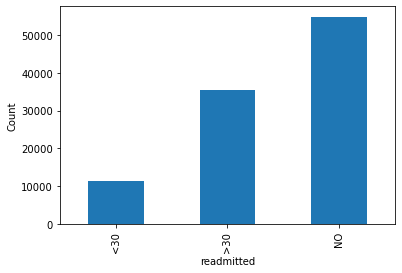

In [253]:
# the response variable 'readmitted' in the original dataset contains three categories.
# 11% of patients were readmitted within 30 days (<30)
# 35% of patients were readmitted after 30 days (>30)
# 54% of patients were never readmitted (NO)
data.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [254]:
# recode the response variable so that it becomes a binary classification task.
# '0' means no readmission
# '1' means readmission no matter how many days after being discharged
data['readmitted'] = pd.Series([0 if val == 'NO' else 1 for val in data['readmitted']])
data_origin = data

Text(0, 0.5, 'Count')

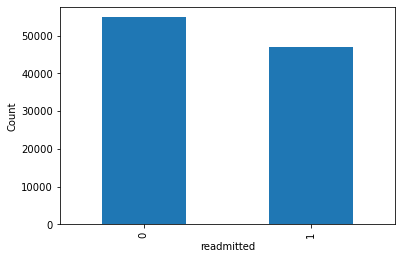

In [255]:
# plot 'readmitted' again to see the change
data.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [256]:
# remove irrelevant features
data.drop(['encounter_id', 'patient_nbr', 'payer_code'], axis=1, inplace=True)

In [257]:
# check NA in 'weight'
data[data['weight'] == '?'].shape[0] * 1.0 / data.shape[0]

0.9685847925633315

In [258]:
# check NA in 'medical_specialty'
data[data['medical_specialty'] == '?'].shape[0] * 1.0 / data.shape[0]

0.49082208203132677

In [259]:
# remove 'weight' and 'medical_specialty' because it's hard to do imputation on them
data.drop(['weight', 'medical_specialty'], axis=1, inplace=True)

In [260]:
# remove rows that have NA in 'race', 'diag_1', 'diag_2', or 'diag_3'
# remove rows that have invalid values in 'gender'
data = data[data['race'] != '?']
data = data[data['diag_1'] != '?']
data = data[data['diag_2'] != '?']
data = data[data['diag_3'] != '?']
data = data[data['gender'] != 'Unknown/Invalid']

Text(0, 0.5, 'Count')

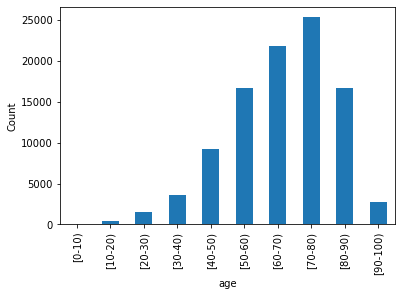

In [261]:
# check 'age' feature
data.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

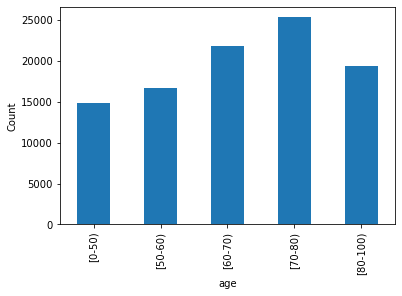

In [262]:
# Recategorize 'age' so that the population is more evenly distributed
data['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                         for val in data['age']], index=data.index)
data['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                         for val in data['age']], index=data.index)

data.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

In [263]:
# original 'discharge_disposition_id' contains 28 levels
# reduce 'discharge_disposition_id' levels into 2 categories
# discharge_disposition_id = 1 corresponds to 'Discharge Home'
data['discharge_disposition_id'] = pd.Series(['Home' if val == 1 else 'Other discharge' 
                                              for val in data['discharge_disposition_id']], index=data.index)

In [264]:
# original 'admission_source_id' contains 25 levels
# reduce 'admission_source_id' into 3 categories
data['admission_source_id'] = pd.Series(['Emergency Room' if val == 7 else 'Referral' if val == 1 else 'Other source' 
                                              for val in data['admission_source_id']], index=data.index)

In [265]:
# original 'admission_type_id' contains 8 levels
# reduce 'admission_type_id' into 2 categories
data['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Other type' 
                                              for val in data['admission_type_id']], index=data.index)

23 features represent different medications.So, it has to be decided should we use them all in the model?

How to deal with 'diag_1', 'diag_2', and 'diag_3'?

Based on the results found in Reference[1], we know that:

    The statistical model suggests that the relationship between the probability of readmission and the HbA1c measurement depends on the primary diagnosis.

    The only medication that varied significantly across the patients was the delivery of insulin, while other medications remained common among all the patients.

    It may not be surprising that the attention given to diabetes care in individuals with admitting diagnoses of circulatory or respiratory diseases may have been less than those with a primary diagnosis of diabetes mellitus.

    Greater attention to diabetes care during the hospitalization for these high-risk individuals may have a significant impact on readmission.

    The primary, secondary, and third medical diagnoses are marked by the ICD9 codes.

    ICD9 code for diabetes: 250.xx



Text(0, 0.5, 'Count')

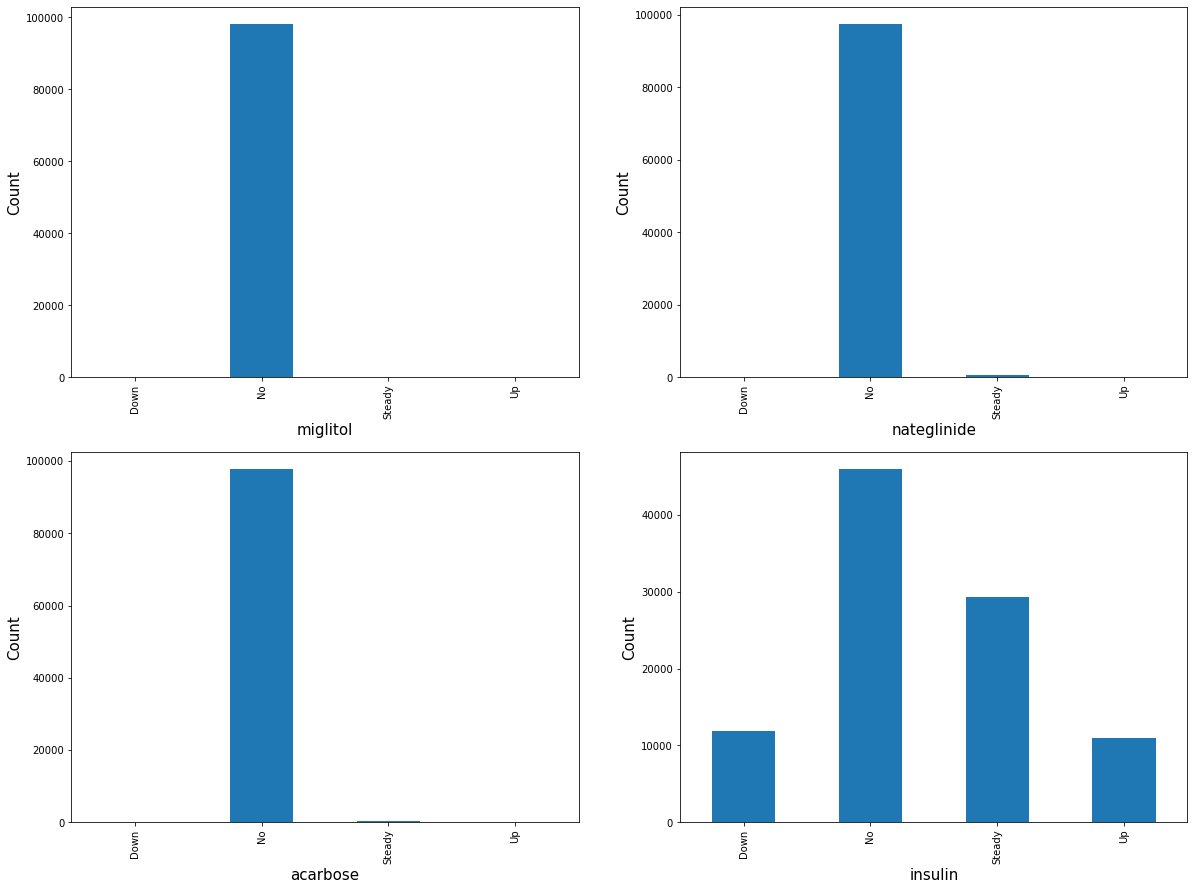

In [266]:
# compare diabetes medications 'miglitol', 'nateglinide' and 'acarbose' with 'insulin', as an example
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(221)
ax1 = data.groupby('miglitol').size().plot(kind='bar')
plt.xlabel('miglitol', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax2 = fig.add_subplot(222)
ax2 = data.groupby('nateglinide').size().plot(kind='bar')
plt.xlabel('nateglinide', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax3 = fig.add_subplot(223)
ax3 = data.groupby('acarbose').size().plot(kind='bar')
plt.xlabel('acarbose', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax4 = fig.add_subplot(224)
ax4 = data.groupby('insulin').size().plot(kind='bar')
plt.xlabel('insulin', fontsize=15)
plt.ylabel('Count', fontsize=15)

In [267]:
# keep only 'insulin' and remove the other 22 diabetes medications
data.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)

In [268]:
# denote 'diag_1' as '1' if it relates to diabetes and '0' if it's not
# remove 'diag_2' and 'diag_3'
data['diag_1'] = pd.Series([1 if val.startswith('250') else 0 for val in data['diag_1']], index=data.index)
data.drop(['diag_2', 'diag_3'], axis=1, inplace=True)

In [269]:
data.shape

(98052, 21)

In [270]:
# we end up with 98052 rows, 20 features, and one response variable 'readmitted' 
list(data.columns.values)

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

# Data Preprocessing

In [271]:
# one-hot-encoding on categorical features
# convert nominal values to dummy values
df_age = pd.get_dummies(data['age'])
df_race = pd.get_dummies(data['race'])
df_gender = pd.get_dummies(data['gender'])
df_max_glu_serum = pd.get_dummies(data['max_glu_serum'])
df_A1Cresult = pd.get_dummies(data['A1Cresult'])
df_insulin = pd.get_dummies(data['insulin'])
df_change = pd.get_dummies(data['change'])
df_diabetesMed = pd.get_dummies(data['diabetesMed'])
df_discharge_disposition_id = pd.get_dummies(data['discharge_disposition_id'])
df_admission_source_id = pd.get_dummies(data['admission_source_id'])
df_admission_type_id = pd.get_dummies(data['admission_type_id'])

data = pd.concat([data, df_age, df_race, df_gender, df_max_glu_serum, df_A1Cresult, 
                  df_insulin, df_change, df_diabetesMed, df_discharge_disposition_id, 
                  df_admission_source_id, df_admission_type_id], axis=1)
data.drop(['age', 'race', 'gender', 'max_glu_serum', 'A1Cresult', 'insulin', 'change', 
                  'diabetesMed', 'discharge_disposition_id', 'admission_source_id', 
                  'admission_type_id'], axis=1, inplace=True)

In [272]:
# apply square root transformation on right skewed count data to reduce the effects of extreme values.
# here log transformation is not appropriate because the data is Poisson distributed and contains many zero values.
data['number_outpatient'] = data['number_outpatient'].apply(lambda x: np.sqrt(x + 0.5))
data['number_emergency'] = data['number_emergency'].apply(lambda x: np.sqrt(x + 0.5))
data['number_inpatient'] = data['number_inpatient'].apply(lambda x: np.sqrt(x + 0.5))

In [273]:
# feature scaling, features are standardized to have zero mean and unit variance
feature_scale_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[feature_scale_cols])
data_scaler = scaler.transform(data[feature_scale_cols])

data_scaler_df = pd.DataFrame(data=data_scaler, columns=feature_scale_cols, index=data.index)
data.drop(feature_scale_cols, axis=1, inplace=True)
data = pd.concat([data, data_scaler_df], axis=1)

Data Preparation Summary

    Remove NA in 'race', 'gender', 'diag_1', 'diag_2', and 'diag_3'
    Remove 29 features in total: 'encounter_id', 'patient_nbr', 'payer_code', 'weight', 'medical_specialty', 'diag_2', 'diag_3', and 22 features for medications, including 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', and 'metformin-pioglitazone'
    Recategorize 'age' feature
    Reduce levels in 'discharge_disposition_id', 'admission_source_id', and 'admission_type_id'
    One-hot-encode on categorical data
    Square root transform on right skewed count data
    Apply feature standardizing on numerical data



# Feature Importance

Evaluate the importance of different features by using emsemble method

In [274]:
# create X (features) and y (response)
X = data.drop(['readmitted'], axis=1)
y = data['readmitted']

In [276]:
# split X and y into cross-validation (75%) and testing (25%) data sets
from sklearn.model_selection import train_test_split
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.25)

Top 6 features are: 
num_lab_procedures
num_medications
time_in_hospital
num_procedures
number_diagnoses
number_inpatient


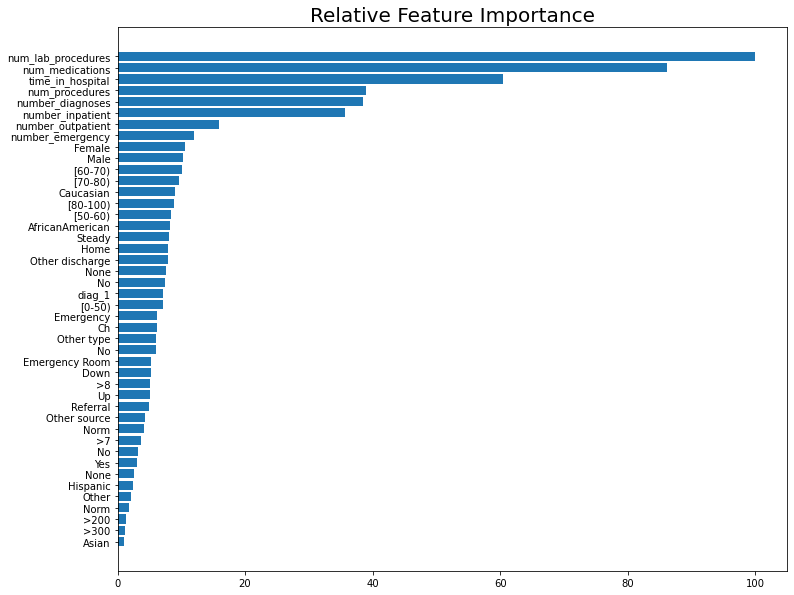

In [279]:
# fit Random Forest model to the cross-validation data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_cv, y_cv)
importances = forest.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_cv.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print ('Top 6 features are: ')
for feature in feature_names_sort[::-1][:6]:
    print (feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

In [280]:
# make a smaller feature set which only contains the top 6 features
X_cv_top6 = X_cv[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses',
           'number_inpatient']]

# Model Selection

Select the best model using 10-fold cross validation. The metric that will be using is the accuracy of prediction.

In [285]:
from sklearn.model_selection import cross_val_score

In [286]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
RF_score = cross_val_score(clf1, X_cv, y_cv, cv=10, scoring='accuracy').mean()
RF_score

0.609105382364991

In [287]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
NB_score = cross_val_score(clf2, X_cv, y_cv, cv=10, scoring='accuracy').mean()
NB_score

0.5995864793484155

In [288]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()
LR_score = cross_val_score(clf3, X_cv, y_cv, cv=10, scoring='accuracy').mean()
LR_score

0.6189504442082494

Text(0, 0.5, 'Cross-Validated Accuracy')

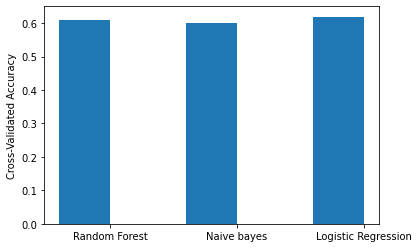

In [289]:
# plot and compare the scores
# LR outperforms the other two a little bit
x_axis = np.arange(3)
y_axis = [RF_score, NB_score, LR_score]
plt.bar(x_axis, y_axis, width=0.4)
plt.xticks(x_axis + 0.4/2., ('Random Forest', 'Naive bayes', 'Logistic Regression'))
plt.ylabel('Cross-Validated Accuracy')

In [290]:
# Logistic Regression on Top 6 features
# still be able to achieve good result with reduced running time
LR_score_top = cross_val_score(clf3, X_cv_top6, y_cv, cv=10, scoring='accuracy').mean()
LR_score_top

0.6124777929163023

# Parameter Tuning Using GridSearchCV

Use GridSearchCV to tune parameter C in logistic regression. Smaller C values specify stronger regularization.

In [291]:
# define the parameter values that should be searched
C_range = np.arange(0.1, 3.1, 0.2)
param_grid = dict(C = C_range)

In [ ]:
# Instantiate the grid, fit the grid with data
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(X_cv, y_cv)

In [297]:
# examine the best model
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.6190048400744151
{'C': 0.1}
LogisticRegression(C=0.1)


# Evaluation Metrics

# Classification accuracy

NULL accuracy: accuracy that could be achieved by always predicting the most frequent class -- 'No Readmission'.


In [298]:
# examine the class distribution of the testing set
y_test.value_counts()

0    13081
1    11432
Name: readmitted, dtype: int64

In [299]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.5336352139680985

In [300]:
# train a logistic regression model on the cross-validation set with the optimal C parameter
logreg = LogisticRegression(C=grid.best_params_['C'])
logreg.fit(X_cv, y_cv)

LogisticRegression(C=0.1)

In [302]:
# make class predictions for the testing set 
# calculate accuracy and compare with null accuracy
from sklearn import metrics
y_pred_class = logreg.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))

0.6174274874556358


# Confusion matrix

Table that describes the performance of a classification model.

True Positives (TP): we correctly predicted that they do have diabetes

True Negatives (TN): we correctly predicted that they don't have diabetes

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error"

In [304]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print (confusion)

[[10108  2973]
 [ 6405  5027]]


Sensitivity (Recall): How "sensitive" is the classifier to detecting positive instances? TP/(TP+FN)

In [306]:
print (metrics.recall_score(y_test, y_pred_class))

0.4397305808257523


Specificity: TN/(TN+FP)


In [308]:
print (TN / float(TN + FP))

0.7727237978747802


False Positive Rate (1 - specificity): FP/(TN+FP)


In [309]:
print (FP / float(TN + FP))

0.2272762021252198


Precision: TP/(TP+FP)


In [310]:
print (metrics.precision_score(y_test, y_pred_class))

0.628375


F1 score: F1 = 2 x precision x recall / (precision + recall)


In [311]:
print (metrics.f1_score(y_test, y_pred_class))

0.5173939892960067


# Receiver operating characteristic (ROC) curve and area under the curve (AUC)

ROC is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. AUC is the percentage of the ROC plot that is underneath the curve. AUC is useful as a single number summary of classifier performance.


In [312]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

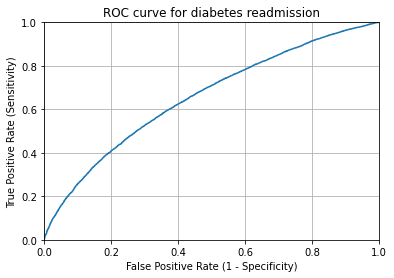

In [313]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes readmission')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [315]:
# AUC score
print (metrics.roc_auc_score(y_test, y_pred_prob))

0.6567879977150498


# Adjusting the classification threshold

Decrease the threshold to increase the sensitivity of the classifier, which is more favorable to the prediction of diabetes patient readmission.


In [318]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print ('Sensitivity:', tpr[thresholds > threshold][-1])
    print ('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [319]:
# predict readmission if the predicted probability is greater than 0.40
# the resulting sensitivity can achieve above 0.70
evaluate_threshold(0.40)

Sensitivity: 0.7339048285514346
Specificity: 0.47007109548199677


In [321]:
# new prediction accuracy
y_pred_prob = logreg.predict_proba(X_test)
y_pred_new = []

for i in range(len(y_pred_prob)):
    if y_pred_prob[i][1] > 0.4:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)

print (metrics.accuracy_score(y_test, y_pred_new))

0.5930322685921756


# Conclusions

Six major features are found to have high impact on diabetes patient readmission: number of lab procedures, number of medications administrated during the encounter, time spent in hospital, number of procedures other than lab tests, number of diagnoses, and number of inpatient visits.

The logistic regression classifier modeling achieves 0.62 accuracy and 0.66 AUC score. The sensitivity of the modeling can be increased by adjusting the classification threshold.

To correctly predict the readmission and avoid extra cost, hospitals should carefully examine the clinical data of patients and pay special attention to the above major features.

Some other features might be worth collecting, for example, date of admission and family history.

This analytic method can be applied to different diseases other than diabetes.

